In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from astropy.visualization import ZScaleInterval

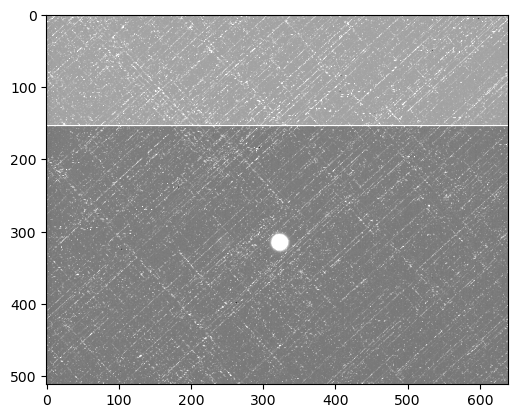

In [3]:
########################### test bias subtraction ##############################

# load and median-collapse bias file: -40C, 0 ms, 400 fps, 10 exposures, lens cap on
bias_file = r"D:/HWP_Characterization/Data/Raw/CRED2_Characterization/Linearity/-40.0C_0.0028550000000000003_400_bias.fits"
bias_file_data = fits.getdata(bias_file)
bias_median = np.median(bias_file_data, axis=0)

# load and median-collapse test file: -40C, 2 ms, 400 fps, 10 exposures, lens cap off, laser on (1500 nm, 5/5)
fits_path = r"D:/HWP_Characterization/Data/Raw/CRED2_Characterization/Linearity/-40.0C_2.002635_400_test.fits" 
fits_data = fits.getdata(fits_path)
fits_median = np.median(fits_data, axis=0)

bias_subtracted = fits_median - bias_median

zscale=ZScaleInterval()
vmin, vmax=zscale.get_limits(bias_subtracted)
plt.imshow(bias_subtracted, vmin=vmin, vmax=vmax, cmap='gray')

hdu = fits.PrimaryHDU(bias_subtracted)
hdu.writeto('bias_subtracted.fits', overwrite=True)

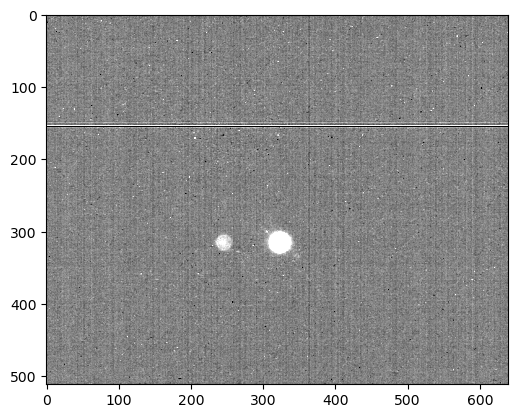

In [5]:
################################### test dark subtraction ##############################
# load and median-collapse dark file: -40C, 2 ms, 400 fps, 10 exposures, lens cap on (same as test file)
dark_file = r"D:/HWP_Characterization/Data/Raw/CRED2_Characterization/Linearity/-40.0C_2.0_400_dark.fits"
dark_file_data = fits.getdata(dark_file)
dark_median = np.median(dark_file_data, axis=0)

dark_subtracted = fits_median - dark_median

zscale=ZScaleInterval()
vmin, vmax=zscale.get_limits(dark_subtracted)
plt.imshow(dark_subtracted, vmin=vmin, vmax=vmax, cmap='gray')

hdu = fits.PrimaryHDU(dark_subtracted)
hdu.writeto('dark_subtracted.fits', overwrite=True)